In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [2]:
dataset = pd.read_csv('Loan prediction mini dataset.csv', header=0)

In [3]:
print(dataset.head())

      Id  Age  Income      Home  Emp_length             Intent  Amount   Rate  \
0  13116   23   88000  MORTGAGE         2.0            MEDICAL    6625  11.22   
1   1742   23   30000      RENT         0.0           PERSONAL    1925  12.18   
2  27672   32  160000  MORTGAGE         9.0  DEBTCONSOLIDATION   12000   7.88   
3  24694   29   75000       OWN         3.0    HOMEIMPROVEMENT   12000   7.51   
4   1994   22   28800      RENT         2.0            VENTURE   14000   7.90   

   Status  Percent_income Default  Cred_length  
0       0            0.08       Y            3  
1       0            0.06       N            2  
2       0            0.07       N            8  
3       0            0.16       N            5  
4       1            0.49       N            2  


In [4]:
print(dataset.info)

<bound method DataFrame.info of          Id  Age  Income      Home  Emp_length             Intent  Amount  \
0     13116   23   88000  MORTGAGE         2.0            MEDICAL    6625   
1      1742   23   30000      RENT         0.0           PERSONAL    1925   
2     27672   32  160000  MORTGAGE         9.0  DEBTCONSOLIDATION   12000   
3     24694   29   75000       OWN         3.0    HOMEIMPROVEMENT   12000   
4      1994   22   28800      RENT         2.0            VENTURE   14000   
...     ...  ...     ...       ...         ...                ...     ...   
8140  28269   34   98000       OWN        19.0            MEDICAL   16000   
8141  17403   22   24000       OWN         3.0            VENTURE    2500   
8142   7305   22   33000      RENT         4.0            MEDICAL    6500   
8143  27625   28   18000       OWN        12.0            VENTURE    3500   
8144  28486   30  148000      RENT         8.0            VENTURE   10000   

       Rate  Status  Percent_income Default

In [5]:
print(dataset.describe())

                 Id          Age        Income   Emp_length        Amount  \
count   8145.000000  8145.000000  8.145000e+03  7909.000000   8145.000000   
mean   16269.966974    27.689748  6.528496e+04     4.728790   9695.656845   
std     9394.610528     6.229731  5.278421e+04     3.991919   6389.975388   
min        4.000000    20.000000  4.000000e+03     0.000000    500.000000   
25%     8134.000000    23.000000  3.860400e+04     2.000000   5000.000000   
50%    16280.000000    26.000000  5.500000e+04     4.000000   8000.000000   
75%    24325.000000    30.000000  7.800000e+04     7.000000  12500.000000   
max    32579.000000   144.000000  1.900000e+06    41.000000  35000.000000   

              Rate       Status  Percent_income  Cred_length  
count  7383.000000  8145.000000     8145.000000  8145.000000  
mean     11.040731     0.218171        0.171769     5.767342  
std       3.226149     0.413029        0.106168     3.981448  
min       5.420000     0.000000        0.000000     2.

In [6]:
print(dataset.isnull().sum())

Id                  0
Age                 0
Income              0
Home                0
Emp_length        236
Intent              0
Amount              0
Rate              762
Status              0
Percent_income      0
Default             0
Cred_length         0
dtype: int64


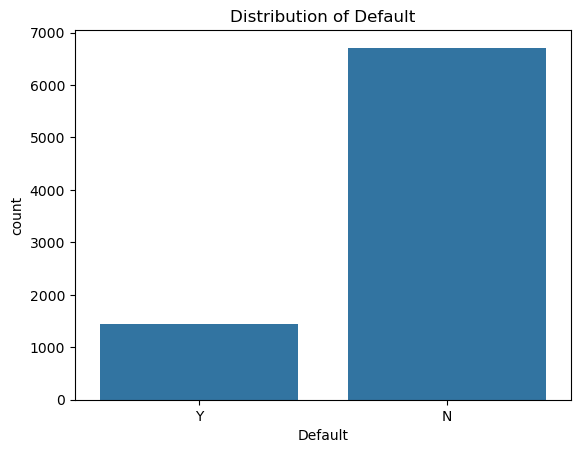

In [7]:
# Visualizing the distribution of Default
sns.countplot(x='Default', data=dataset)
plt.title('Distribution of Default')
plt.show()

In [8]:
# Impute missing values with the mode and median for the Emp_length and Rate.
dataset['Emp_length'].fillna(dataset['Emp_length'].mode()[0], inplace=True)
dataset['Rate'].fillna(dataset['Rate'].median(), inplace=True)

/var/folders/bx/tys9l3gs3t5b_hqdsqy6wc940000gn/T/ipykernel_78299/2420058516.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Emp_length'].fillna(dataset['Emp_length'].mode()[0], inplace=True)
/var/folders/bx/tys9l3gs3t5b_hqdsqy6wc940000gn/T/ipykernel_78299/2420058516.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [9]:
print(dataset.isnull().sum())

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


In [10]:
dataset.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [11]:
dataset['Intent'].value_counts()

Intent
EDUCATION            1636
MEDICAL              1495
VENTURE              1400
PERSONAL             1396
DEBTCONSOLIDATION    1310
HOMEIMPROVEMENT       908
Name: count, dtype: int64

In [12]:
dataset['Home'].value_counts()

Home
RENT        4081
MORTGAGE    3377
OWN          664
OTHER         23
Name: count, dtype: int64

In [13]:
dataset['Default'].value_counts() 

Default
N    6710
Y    1435
Name: count, dtype: int64

In [14]:
# Converting the predictor column to 1 and 0 for better useability
dataset['Default'] = dataset['Default'].apply(lambda x: 1 if x == 'Y' else 0)

# Verify the conversion
print(dataset['Default'].value_counts())

Default
0    6710
1    1435
Name: count, dtype: int64


In [15]:
# Assigning age to Loan applicants who are above the age of 100
dataset['Age'] = dataset['Age'].apply(lambda x: x if x <= 100 else 100)

In [16]:
# Doing one-hot encoding to the categorical object values for columns "Home" and "Intent" columns
dataset_one_hot = pd.get_dummies(dataset, columns=['Home', 'Intent'], drop_first=False)

# Display the updated dataset
print("Columns after one-hot encoding:")
print(dataset_one_hot.dtypes)

Columns after one-hot encoding:
Id                            int64
Age                           int64
Income                        int64
Emp_length                  float64
Amount                        int64
Rate                        float64
Status                        int64
Percent_income              float64
Default                       int64
Cred_length                   int64
Home_MORTGAGE                  bool
Home_OTHER                     bool
Home_OWN                       bool
Home_RENT                      bool
Intent_DEBTCONSOLIDATION       bool
Intent_EDUCATION               bool
Intent_HOMEIMPROVEMENT         bool
Intent_MEDICAL                 bool
Intent_PERSONAL                bool
Intent_VENTURE                 bool
dtype: object


In [17]:
columns_to_drop = ['Home_MORTGAGE', 'Intent_DEBTCONSOLIDATION']
dataset_linear = dataset_one_hot.drop(columns=columns_to_drop)

In [18]:
# Columns to scale
num_cols = ['Age', 'Income', 'Amount', 'Rate', 'Percent_income', 'Cred_length']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
dataset_one_hot[num_cols] = scaler.fit_transform(dataset_one_hot[num_cols])

# Verify scaling
print(dataset_one_hot[num_cols].describe())

               Age       Income       Amount         Rate  Percent_income  \
count  8145.000000  8145.000000  8145.000000  8145.000000     8145.000000   
mean      0.096054     0.032323     0.266541     0.344117        0.223077   
std       0.076842     0.027840     0.185217     0.188208        0.137880   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.037500     0.018251     0.130435     0.188113        0.116883   
50%       0.075000     0.026899     0.217391     0.341299        0.194805   
75%       0.125000     0.039030     0.347826     0.474265        0.298701   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

       Cred_length  
count  8145.000000  
mean      0.134548  
std       0.142195  
min       0.000000  
25%       0.035714  
50%       0.071429  
75%       0.214286  
max       1.000000  


In [19]:
# Separate features and target
X = dataset_one_hot.drop(['Id', 'Default'], axis=1)
y = dataset_one_hot['Default']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({1: 6710, 0: 6710})


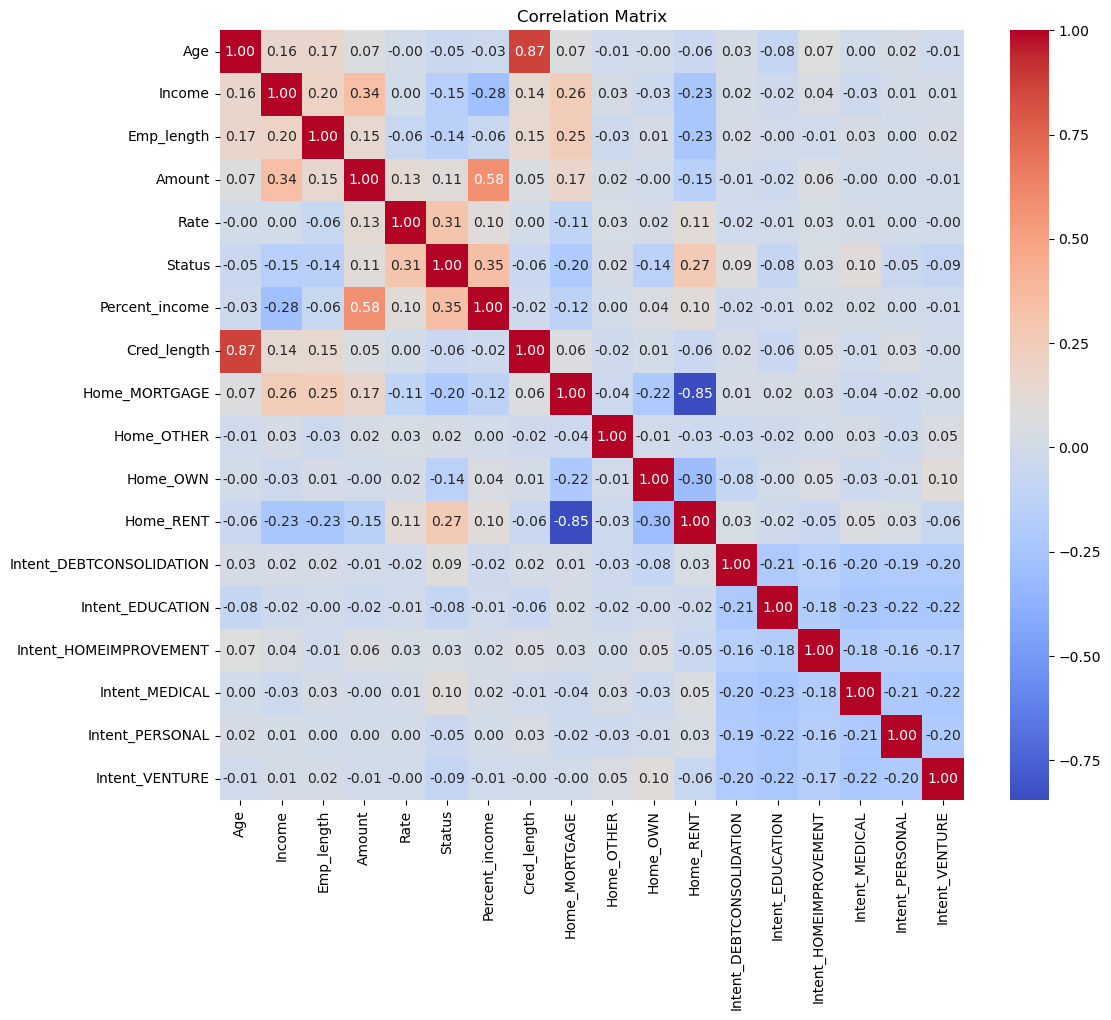

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_resampled.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

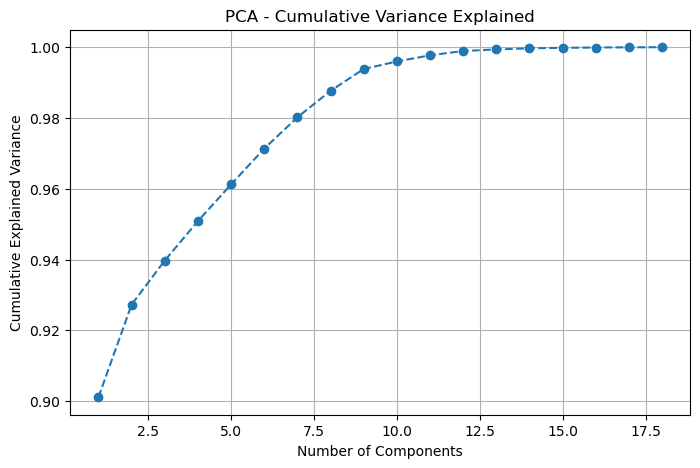

Number of components to retain 95% variance: 4


In [21]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA
pca = PCA()
pca.fit(X_resampled)

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Variance Explained')
plt.grid()
plt.show()

# Print the number of components to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Step 1: Apply PCA with 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_resampled)

# Step 2: Check the shape of the transformed dataset
print(f"Shape of data after PCA: {X_pca.shape}")

# Step 3: Split the PCA-transformed dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

# Verify the shape of training and test sets
print(f"Training data shape: {X_train_pca.shape}")
print(f"Test data shape: {X_test_pca.shape}")

Shape of data after PCA: (13420, 4)
Training data shape: (10736, 4)
Test data shape: (2684, 4)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train)

# Evaluate Logistic Regression
y_pred_log = log_model.predict(X_test_pca)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_pca)[:, 1]))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      1361
           1       0.55      0.47      0.51      1323

    accuracy                           0.55      2684
   macro avg       0.55      0.55      0.54      2684
weighted avg       0.55      0.55      0.54      2684

ROC-AUC: 0.5772310720353127


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_pca)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test_pca)[:, 1]))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1361
           1       0.81      0.88      0.84      1323

    accuracy                           0.84      2684
   macro avg       0.84      0.84      0.84      2684
weighted avg       0.84      0.84      0.84      2684

ROC-AUC: 0.9173024259095426


In [25]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_pca, y_train)

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test_pca)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_pca)[:, 1]))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1361
           1       0.78      0.87      0.82      1323

    accuracy                           0.81      2684
   macro avg       0.82      0.81      0.81      2684
weighted avg       0.82      0.81      0.81      2684

ROC-AUC: 0.8783479756503794


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Define the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_pca.shape[1]),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_data=(X_test_pca, y_test))

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test_pca, y_test)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

# Predict and evaluate
y_pred_nn = (nn_model.predict(X_test_pca) > 0.5).astype("int32")
print("Neural Network Performance:")
print(classification_report(y_test, y_pred_nn))

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.5125 - loss: 0.6996 - val_accuracy: 0.5600 - val_loss: 0.6820
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.5477 - loss: 0.6861 - val_accuracy: 0.5671 - val_loss: 0.6798
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.5624 - loss: 0.6823 - val_accuracy: 0.5548 - val_loss: 0.6812
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.5599 - loss: 0.6800 - val_accuracy: 0.5760 - val_loss: 0.6792
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.5661 - loss: 0.6777 - val_accuracy: 0.5671 - val_loss: 0.6758
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.5703 - loss: 0.6757 - val_accuracy: 0.5782 - val_loss: 0.6770
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.5720 - loss: 0.6767 - val_accuracy: 0.5849 - val_loss: 0.6757
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.5731 - loss: 0.6754 - val_accurac

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Lasso Regression (Logistic Regression with L1 regularization)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)  # C is the inverse of regularization strength
lasso_model.fit(X_train_pca, y_train)

# Evaluate Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_pca)
print("Lasso Regression Performance:")
print(classification_report(y_test, y_pred_lasso))
print("ROC-AUC:", roc_auc_score(y_test, lasso_model.predict_proba(X_test_pca)[:, 1]))

Lasso Regression Performance:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1361
           1       0.56      0.50      0.52      1323

    accuracy                           0.56      2684
   macro avg       0.56      0.55      0.55      2684
weighted avg       0.56      0.56      0.55      2684

ROC-AUC: 0.5816146035522545


In [28]:
from sklearn.svm import SVC

# Train SVM with RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_pca, y_train)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_pca)
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, svm_model.predict_proba(X_test_pca)[:, 1]))

SVM Performance:
              precision    recall  f1-score   support

           0       0.56      0.73      0.63      1361
           1       0.59      0.40      0.48      1323

    accuracy                           0.57      2684
   macro avg       0.58      0.57      0.56      2684
weighted avg       0.57      0.57      0.56      2684

ROC-AUC: 0.5963113468099298


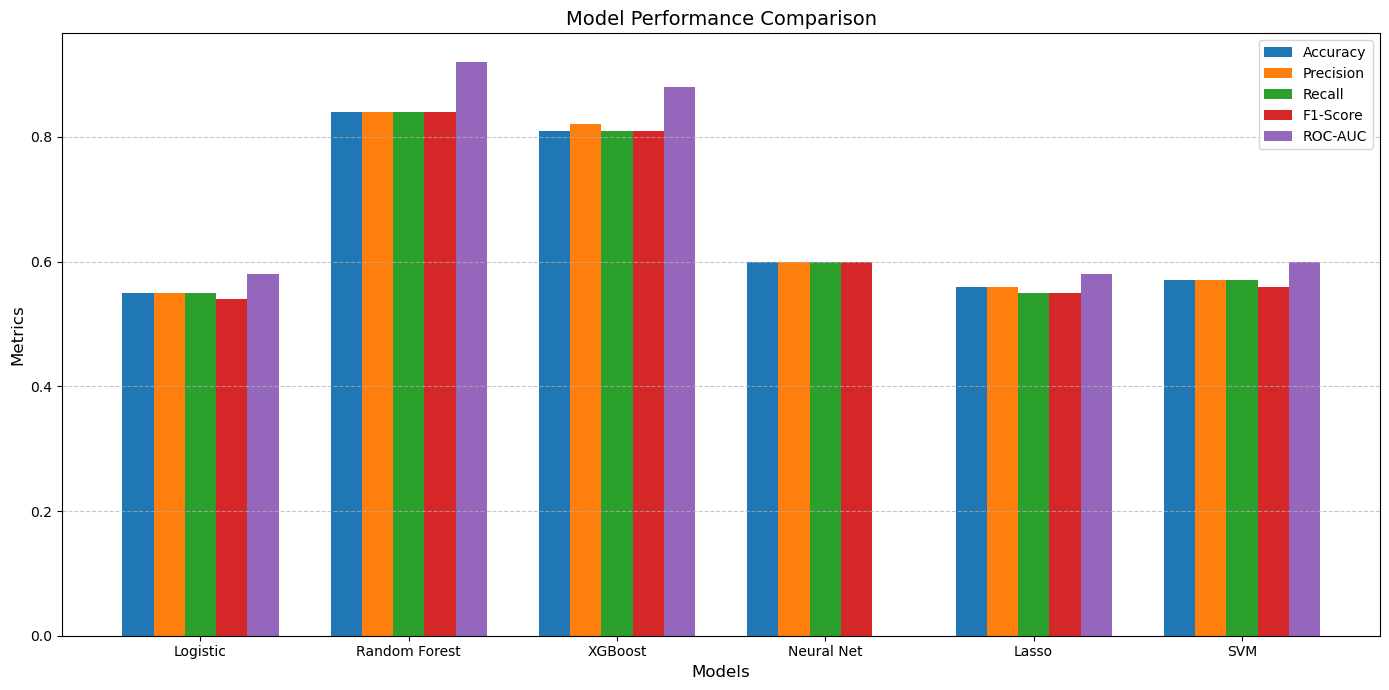

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['Logistic', 'Random Forest', 'XGBoost', 'Neural Net', 'Lasso', 'SVM']
accuracy = [0.55, 0.84, 0.81, 0.60, 0.56, 0.57]
precision = [0.55, 0.84, 0.82, 0.60, 0.56, 0.57]
recall = [0.55, 0.84, 0.81, 0.60, 0.55, 0.57]
f1_score = [0.54, 0.84, 0.81, 0.60, 0.55, 0.56]
roc_auc = [0.58, 0.92, 0.88, None, 0.58, 0.60]

# Number of models
x = np.arange(len(models))

# Bar width
width = 0.15

# Plot metrics
plt.figure(figsize=(14, 7))
plt.bar(x - 2*width, accuracy, width, label='Accuracy')
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')
plt.bar(x + 2*width, [v if v is not None else 0 for v in roc_auc], width, label='ROC-AUC')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks(x, models, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [30]:
# Step 1: Prepare dataset_linear
# Separate features and target
X_linear = dataset_linear.drop(['Id', 'Default'], axis=1)  # Drop 'Id' and 'Default'
y_linear = dataset_linear['Default']

# Step 2: Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_linear_resampled, y_linear_resampled = smote.fit_resample(X_linear, y_linear)

# Step 3: Scale the numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_linear_resampled_scaled = scaler.fit_transform(X_linear_resampled)

# Step 4: Split the data
from sklearn.model_selection import train_test_split

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_resampled_scaled, y_linear_resampled, test_size=0.2, random_state=42
)

# Step 5: Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_model_linear = LogisticRegression()
log_model_linear.fit(X_train_linear, y_train_linear)

# Evaluate Logistic Regression
y_pred_log_linear = log_model_linear.predict(X_test_linear)
print("Logistic Regression with dataset_linear Performance:")
print(classification_report(y_test_linear, y_pred_log_linear))
print("ROC-AUC:", roc_auc_score(y_test_linear, log_model_linear.predict_proba(X_test_linear)[:, 1]))

# Step 6: Train Lasso Regression (Logistic Regression with L1 regularization)
lasso_model_linear = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)  # C controls regularization strength
lasso_model_linear.fit(X_train_linear, y_train_linear)

# Evaluate Lasso Regression
y_pred_lasso_linear = lasso_model_linear.predict(X_test_linear)
print("Lasso Regression with dataset_linear Performance:")
print(classification_report(y_test_linear, y_pred_lasso_linear))
print("ROC-AUC:", roc_auc_score(y_test_linear, lasso_model_linear.predict_proba(X_test_linear)[:, 1]))

Logistic Regression with dataset_linear Performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1361
           1       0.84      0.88      0.86      1323

    accuracy                           0.86      2684
   macro avg       0.86      0.86      0.86      2684
weighted avg       0.86      0.86      0.86      2684

ROC-AUC: 0.9244514198854497
Lasso Regression with dataset_linear Performance:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1361
           1       0.82      0.92      0.87      1323

    accuracy                           0.86      2684
   macro avg       0.87      0.87      0.86      2684
weighted avg       0.87      0.86      0.86      2684

ROC-AUC: 0.9149065618573334


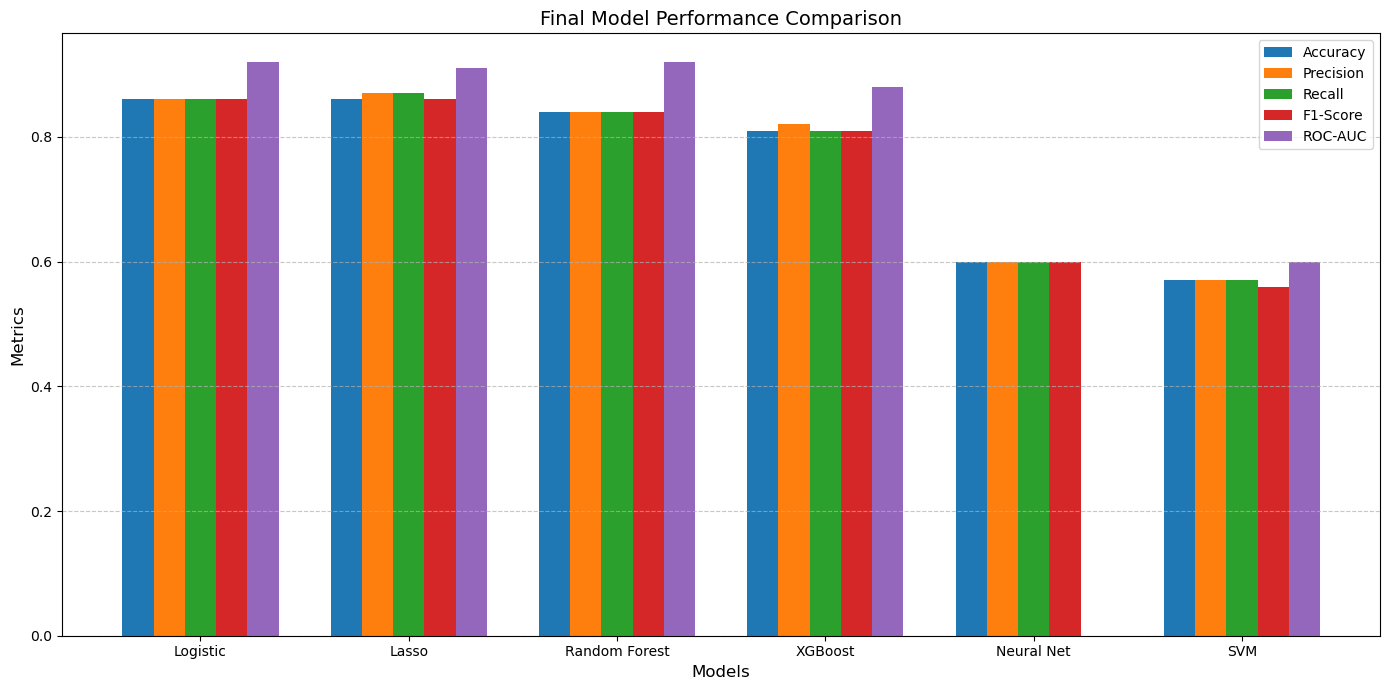

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['Logistic', 'Lasso', 'Random Forest', 'XGBoost', 'Neural Net', 'SVM']
accuracy = [0.86, 0.86, 0.84, 0.81, 0.60, 0.57]  # Update these based on your results
precision = [0.86, 0.87, 0.84, 0.82, 0.60, 0.57]  # Update these based on your results
recall = [0.86, 0.87, 0.84, 0.81, 0.60, 0.57]     # Update these based on your results
f1_score = [0.86, 0.86, 0.84, 0.81, 0.60, 0.56]   # Update these based on your results
roc_auc = [0.92, 0.91, 0.92, 0.88, None, 0.60]    # Update these based on your results

# Number of models
x = np.arange(len(models))

# Bar width
width = 0.15

# Plot metrics
plt.figure(figsize=(14, 7))
plt.bar(x - 2*width, accuracy, width, label='Accuracy')
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')
plt.bar(x + 2*width, [v if v is not None else 0 for v in roc_auc], width, label='ROC-AUC')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Final Model Performance Comparison', fontsize=14)
plt.xticks(x, models, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid search
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

rf_grid_search.fit(X_train_pca, y_train)
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best ROC-AUC: {rf_grid_search.best_score_}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best ROC-AUC: 0.8972211329389284


In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized search
xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train_pca, y_train)
print(f"Best parameters for XGBoost: {xgb_random_search.best_params_}")
print(f"Best ROC-AUC: {xgb_random_search.best_score_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:18:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best ROC-AUC: 0.8773016051869522


In [34]:
from tensorflow.keras.layers import BatchNormalization

# Updated model
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_pca.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_pca, y_train, epochs=50, batch_size=64, validation_data=(X_test_pca, y_test))

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.5246 - loss: 0.7448 - val_accuracy: 0.5708 - val_loss: 0.6829
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5445 - loss: 0.6985 - val_accuracy: 0.5589 - val_loss: 0.6780
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5542 - loss: 0.6877 - val_accuracy: 0.5719 - val_loss: 0.6715
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5714 - loss: 0.6833 - val_accuracy: 0.5775 - val_loss: 0.6704
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5662 - loss: 0.6806 - val_accuracy: 0.5827 - val_loss: 0.6747
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5667 - loss: 0.6806 - val_accuracy: 0.5857 - val_loss: 0.6704
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.5653 - loss: 0.6791 - val_accuracy: 0.5950 - val_loss: 0.6689
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.5733 - loss: 0.6753 - val_accurac

In [35]:
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Evaluate the model on the test set
loss, accuracy = nn_model.evaluate(X_test_pca, y_test)
print(f"Neural Network Test Accuracy: {accuracy:.4f}")

# Step 2: Generate predictions
y_pred_prob = nn_model.predict(X_test_pca)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Step 3: Calculate metrics
print("Neural Network Performance:")
print(classification_report(y_test, y_pred))

# Step 4: Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Neural Network ROC-AUC: {roc_auc:.4f}")

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.6157 - loss: 0.6522
Neural Network Test Accuracy: 0.6159
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
Neural Network Performance:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1361
           1       0.63      0.55      0.58      1323

    accuracy                           0.62      2684
   macro avg       0.62      0.61      0.61      2684
weighted avg       0.62      0.62      0.61      2684

Neural Network ROC-AUC: 0.6719


In [36]:
from sklearn.ensemble import StackingClassifier

# Define base models
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Stacking classifier
stacked_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=3
)

stacked_model.fit(X_train_pca, y_train)
y_pred_stacked = stacked_model.predict(X_test_pca)

# Evaluate
print("Stacking Model Performance:")
print(classification_report(y_test, y_pred_stacked))
print("ROC-AUC:", roc_auc_score(y_test, stacked_model.predict_proba(X_test_pca)[:, 1]))

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:20:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:20:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1361
           1       0.82      0.87      0.85      1323

    accuracy                           0.84      2684
   macro avg       0.84      0.84      0.84      2684
weighted avg       0.84      0.84      0.84      2684

ROC-AUC: 0.9169622620866454


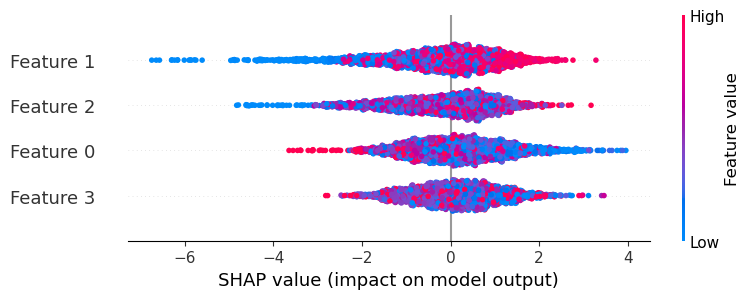

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   6.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   6.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   6.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, min_samples_lea

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   6.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   6.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   6.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, min_samples_lea

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   6.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, min_sam

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   6.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   6.3s
[CV] END bootstrap=True, max_depth=10, min_

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   6.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   6.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   6.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, min_sam

In [38]:
import shap

# Explain the model predictions
explainer = shap.TreeExplainer(xgb_random_search.best_estimator_)
shap_values = explainer.shap_values(X_test_pca)

# Visualize feature importance
shap.summary_plot(shap_values, X_test_pca)